In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/trihalomethanes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Conductivity     3276 non-null   float64
 4   Turbidity        3276 non-null   float64
 5   Trihalomethanes  3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


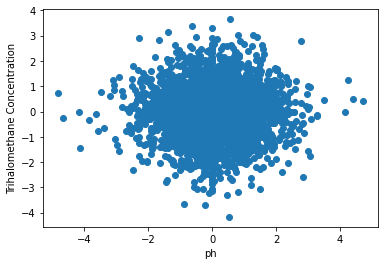

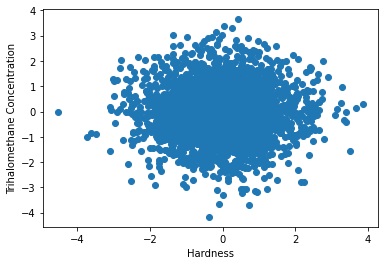

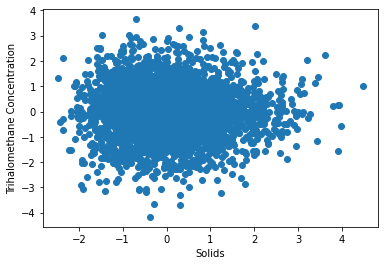

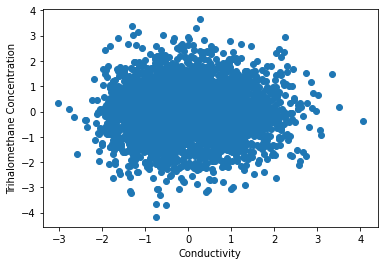

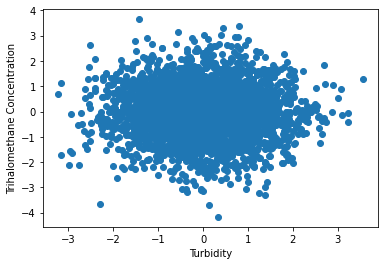

In [4]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Trihalomethanes"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Trihalomethane Concentration")
    plt.show()

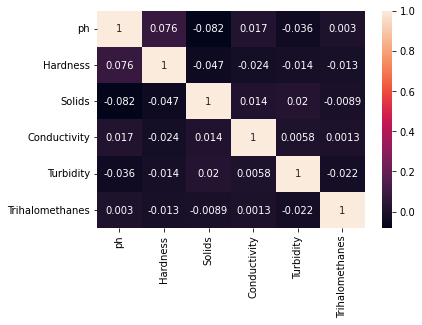

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
from pycaret.regression import *
regression = setup(df, target='Trihalomethanes', fold=3)
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,6730
1,Target,Trihalomethanes
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.7715,1.0026,1.0009,-0.0010,0.6042,1.0142,0.7833
en,Elastic Net,0.7715,1.0026,1.0009,-0.0010,0.6042,1.0142,0.2367
dummy,Dummy Regressor,0.7715,1.0026,1.0009,-0.0010,0.6042,1.0142,0.3800
llar,Lasso Least Angle Regression,0.7715,1.0026,1.0009,-0.0010,0.6042,1.0142,0.2700
br,Bayesian Ridge,0.7715,1.0026,1.0009,-0.0011,0.6042,1.0150,0.2933
omp,Orthogonal Matching Pursuit,0.7737,1.0047,1.0019,-0.0031,0.5943,1.0567,0.2733
lr,Linear Regression,0.7739,1.0053,1.0022,-0.0037,0.5900,1.0718,1.0933
ridge,Ridge Regression,0.7739,1.0053,1.0022,-0.0037,0.5901,1.0717,1.0067
lar,Least Angle Regression,0.7739,1.0053,1.0022,-0.0037,0.5900,1.0718,0.3067
huber,Huber Regressor,0.7746,1.0059,1.0025,-0.0044,0.5841,1.0828,0.3000


                                    Model     MAE     MSE    RMSE      R2  \
lasso                    Lasso Regression  0.7715  1.0026  1.0009 -0.0010   
en                            Elastic Net  0.7715  1.0026  1.0009 -0.0010   
dummy                     Dummy Regressor  0.7715  1.0026  1.0009 -0.0010   
llar         Lasso Least Angle Regression  0.7715  1.0026  1.0009 -0.0010   
br                         Bayesian Ridge  0.7715  1.0026  1.0009 -0.0011   
omp           Orthogonal Matching Pursuit  0.7737  1.0047  1.0019 -0.0031   
lr                      Linear Regression  0.7739  1.0053  1.0022 -0.0037   
ridge                    Ridge Regression  0.7739  1.0053  1.0022 -0.0037   
lar                Least Angle Regression  0.7739  1.0053  1.0022 -0.0037   
huber                     Huber Regressor  0.7746  1.0059  1.0025 -0.0044   
ada                    AdaBoost Regressor  0.7809  1.0209  1.0101 -0.0197   
gbr           Gradient Boosting Regressor  0.8007  1.0634  1.0306 -0.0613   

In [8]:
import pickle 
pickle.dump(best_model, open("Models/Trihalomethanes_Regressor.pkl", "wb"))